In [1]:
from clustering import reduce_dimensions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./saves/dataframe.csv')
labels = df['label'].unique()
data = {}
for label in labels:
    data[label] = df[df['label']==label]['embedding']

vectors = [[float(v.strip('\n\r')) for v in vector.strip(' []').split(' ') if v!=''] for label in labels for vector in data[label]]
labels = [label for label in labels for i in range(len(data[label]))]

In [ ]:
x_vals, y_vals, labels = reduce_dimensions(vectors, labels)


In [133]:
# [float(v.strip('\n\r')) for v in vectors[0].strip(' []').split(' ') if v!='']

AttributeError: 'list' object has no attribute 'strip'

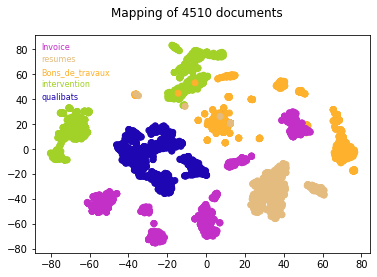

In [154]:
# plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()
colors = {}
for label in data:
    colors[label] = [np.random.random() for i in range(3)]
c = [colors[label] for label in data for i in range(len(data[label]))]

ax.scatter(x_vals, y_vals, c=c)
offset = 0
fig.suptitle(f'Mapping of {len(vectors)} documents')
for label in data:
    ax.text(-85, 40+offset, label, fontsize=8,  color=colors[label])
    offset+=10

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

X_train, X_test, y_train, y_test = train_test_split(vectors, labels, test_size=0.33, random_state=42)

In [44]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9865681665547347